# Graph

## 1. Network-Delay-Time (Dijkstra & Bellman-Ford & Floyd-Warshall)
    - You are given a network of n nodes, labeled from 1 to n. You are also given times, a list of travel times as directed edges times[i] = (ui, vi, wi), where ui is the source node, vi is the target node, and wi is the time it takes for a signal to travel from source to target.
    - We will send a signal from a given node k. 
    - Return the minimum time it takes for all the n nodes to receive the signal. 
    - If it is impossible for all the n nodes to receive the signal, return -1.

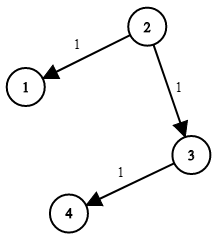

In [ ]:
# 1. Dijkstra
import heapq

def networkDelayTime(times, n, k):
    adj = [[] for _ in range(n + 1)]
    for u, v, cost in times:
        adj[u].append((v, cost))
    
    array = [0] + [float("inf")] * n
    minH = [(0, k)] # (cost(time), start node)

    while minH:
        time, curNode = heapq.heappop(minH)
        if time < array[curNode]:
            array[curNode] = time
            for v, cost in adj[curNode]:        # 모든 연결된 인접리스트 Weight를 time + cost로 업데이트
                heapq.heappush(minH, (time + cost, v))

    if max(array) < float("inf"):
        return max(array)
    else:
        return -1

In [ ]:
# 2. Bellman-Ford
def networkDelayTime(times, n, k):
    array = [0] + [float("inf")] * n
    array[k] = 0    # start cost = 0
    
    for curNode in range(1, n):     # iter all node
        for u, v, cost in times:    # cheack graph
            if array[u] + cost < array[v]:
                array[v] = array[u] + cost
    
    if max(array) < float("inf"):
        return max(array)
    else:
        return -1

In [ ]:
# 3. Floyd-Warshall
def networkDelayTime(times, N, K):
    array = [[float("inf") for _ in range(N+1)] for _ in range(N+1)]
    
    for i in range(1, N+1):
        array[i][i] = 0
        array[i][0] = 0

    for u, v, cost in times:
        if cost < array[u][v]:
            array[u][v] = cost
    
    for k in range(1, N+1):
        for i in range(1, N+1):
            for j in range(1, N+1):
                #if array[i][k] + array[k][j] < array[i][j]:
                #    array[i][j] = array[i][k] + array[k][j]
                array[i][j] = min(array[i][j], array[i][k] + array[k][j])

    
    return -1 if max(array[K]) == float("inf") else max(array[K])      

In [ ]:
"""
Input: times = [[2,1,1],[2,3,1],[3,4,1]], n = 4, k = 2
Output: 2

Input: times = [[1,2,1]], n = 2, k = 1
Output: 1

Input: times = [[1,2,1]], n = 2, k = 2
Output: -1
"""
print(networkDelayTime([[2,1,1],[2,3,1],[3,4,1]], 4, 2))
print(networkDelayTime([[1,2,1]], 2, 1))
print(networkDelayTime([[1,2,1]], 2, 2))

2
1
-1


## 1-1 특정 거리의 도시 찾기(BFS)
    - Directed graph and same weight

In [ ]:
from collections import deque

def findCity(graph, N, K, startNode):
    adj = [[] for _ in range(N+1)]
    for (u, v) in graph:
        adj[u].append(v)

    # Node 값이 작은 것 부터 방문시
    for i in range(N+1):
        adj[i].sort()
    
    # visit list : 방문 리스트에 거리값을 저장하는 것이 핵심
    visited = [-1] * (N+1)

    def BFS(startNode):
        queue = deque()
        queue.append(startNode)
        visited[startNode] += 1  # startNode = 0
        while queue:
            curNode = queue.popleft()
            for nei in adj[curNode]:
                if visited[nei] == -1:
                    visited[nei] = visited[curNode] + 1
                    queue.append(nei)

    BFS(startNode) 
    res = [i for i in range(N+1) if visited[i] == K]

    return res

In [ ]:
print(findCity([(1,3), (1,2), (2,4), (2,3), (3,5), (5,6)], 6, 3, 1))
print(findCity([(1,3), (1,2), (2,4), (2,3), (3,5), (5,6)], 6, 2, 1))

[6]
[4, 5]


## 1-2. 경주로 건설
    - N x N 격자 : 0 = 비어있음. 1 = 채워짐.
    - 경주로 출발점은 (0,0) / 도착점은 (N-1, N-1)
    - 경주로는 중간에 끊기지 않도록 건설. 상하좌우 인접한 2개의 빈칸을 연결할 수 있으며, 벽이 있는 경주로는 건설할 수 없다.
    - 직선도로 : 2 빈칸 연결 / 코너 : 직각으로 만나는 지점
    - 직선도로 : 100원 / 코너 : 500원
    - 경주로를 건설하는데 필요한 최소 비용 계산 리턴

In [ ]:
import heapq
def makeLoad(board):
    ROWS, COLS = len(board), len(board[0])
    minH = [(0,0,-1,0)]     # (y, x, direction, cost)
    visited = [[-1 for _ in range(COLS)] for _ in range(ROWS)]
    res = -1

    # BFS
    while minH:
        y, x, dir, cost = heapq.heappop(minH)
        # Basecase
        if (y, x) == (COLS-1, ROWS-1) and (res == -1 or res > cost):
            res = cost
            
        canMove = [(y,x-1), (y,x+1), (y-1,x), (y+1,x)]
        for i, (ny, nx) in enumerate(canMove):
            # 1.
            if ny < 0 or ny >= COLS or nx < 0 or nx >= ROWS:
                continue
            # 2.
            if board[ny][nx] == 1:
                continue
            # 3.
            newCost = cost+(100 if dir == -1 or dir == i else 600)
            # 4.
            if visited[ny][nx] != -1 and visited[ny][nx] < newCost:
                continue
            heapq.heappush(minH, (ny, nx, i, newCost))
            visited[ny][nx] = newCost

    return res

In [ ]:
board = [[0,0,1,0],
         [0,0,0,0],
         [0,1,0,1],
         [1,0,0,0]]
# reslut = 2100
makeLoad(board)

2100

## 2. Pacific Atlantic Water Flow (DFS)
    - There is an m x n rectangular island that borders both the Pacific Ocean and Atlantic Ocean. 
    - The Pacific Ocean touches the island's left and top edges, and the Atlantic Ocean touches the island's right and bottom edges.
    - The island is partitioned into a grid of square cells. You are given an m x n integer matrix heights where heights[r][c] represents the height above sea level of the cell at coordinate (r, c).
    - The island receives a lot of rain, and the rain water can flow to neighboring cells directly north, south, east, and west if the neighboring cell's height is less than or equal to the current cell's height.
    - Water can flow from any cell adjacent to an ocean into the ocean.
    - Return a 2D list of grid coordinates result where result[i] = [ri, ci] denotes that rain water can flow from cell (ri, ci) to **both the Pacific and Atlantic oceans**.

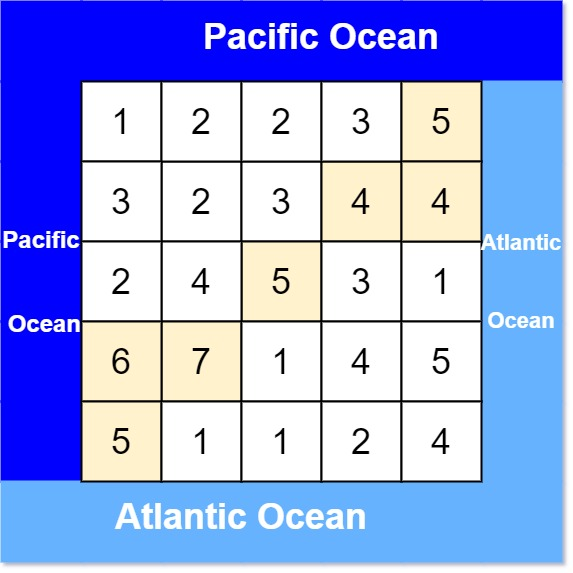

In [ ]:
def pacificAtlantic(heights):

    # visitSet
    rows, cols = len(heights), len(heights[0])
    pac, atl = set(), set()

    # DFS search
    def dfs(y, x, visit, prev_heights):
        # 방문했거나, 바운더리를 벗어나거나, 이전 높이보다 낮은 경우 Return(Continue)
        if (y, x) in visit:
            return
        if x < 0 or y < 0 or x == cols or y == rows:
            return
        if heights[y][x] < prev_heights:
            return
        
        # Else : 방문 체크 & 상하좌우 탐색
        visit.add((y, x))
        dfs(y+1, x, visit, heights[y][x])
        dfs(y-1, x, visit, heights[y][x])
        dfs(y, x+1, visit, heights[y][x])
        dfs(y, x-1, visit, heights[y][x])
    
    # X축 기준 DFS(상-하 : Pac-Atl)
    for c in range(cols):
        dfs(0, c, pac, heights[0][c])            # pacific visit
        dfs(rows-1, c, atl, heights[rows-1][c])  # atlantic visit
    # Y축 기준 DFS(좌-우 : Pac-Atl)
    for r in range(rows):
        dfs(r, 0, pac, heights[r][0])
        dfs(r, cols-1, atl, heights[r][cols-1])
    
    # Y, X 축을 돌면서 pac과 atl에 포함되면 결과에 append
    res = []
    for r in range(rows):
        for c in range(cols):
            if (r, c) in pac and (r, c) in atl:
                res.append([r, c])
    
    return res

In [ ]:
def pacificAtlantic(heights):
    ROWS, COLS = len(heights), len(heights[0])
    # visitSet
    pac, atl = set(), set()
    # DFS Search
    def dfs(r, c, visit, prevHeight):
        if((r,c) in visit or
           r < 0 or c < 0 or r == ROWS or c == COLS or
           heights[r][c] < prevHeight):
           return
        visit.add((r, c))
        dfs(r+1, c, visit, heights[r][c])
        dfs(r-1, c, visit, heights[r][c])
        dfs(r, c+1, visit, heights[r][c])
        dfs(r, c-1, visit, heights[r][c])

    # start node is Top(Pacific) <-> Bottom(Atlanta)
    for c in range(COLS):
        dfs(0, c, pac, heights[0][c])
        dfs(ROWS-1, c, atl, heights[ROWS-1][c])
    
    # start node is Left(Pacific) <-> Right(Atlanta)
    for r in range(ROWS):
        dfs(r, 0, pac, heights[r][0])
        dfs(r, COLS-1, atl, heights[r][COLS-1])
    
    # if (row, col) in pac & atl visitset -> append 
    res = []
    for r in range(ROWS):
        for c in range(COLS):
            if (r, c) in pac and (r, c) in atl:
                res.append([r, c])
    return res

In [ ]:
heights = [[1,2,2,3,5],[3,2,3,4,4],[2,4,5,3,1],[6,7,1,4,5],[5,1,1,2,4]]
pacificAtlantic(heights)

[[0, 4], [1, 3], [1, 4], [2, 2], [3, 0], [3, 1], [4, 0]]

## 3. Number of Islands (BFS & DFS)
    - Given an m x n 2D binary grid grid which represents a map of '1's (land) and '0's (water), return the number of islands.
    - An island is surrounded by water and is formed by connecting adjacent lands horizontally or vertically.
    - You may assume all four edges of the grid are all surrounded by water.

In [ ]:
# DFS
def numIslands(grid):
    if not grid: return 0

    ROWS, COLS = len(grid), len(grid[0])
    isIands = 0

    def dfs(y, x):
        # Boundary & is not Land
        if (y < 0 or y == ROWS or x < 0 or x == COLS or 
            grid[y][x] != "1"):
            return
        
        # visited check : "V"
        grid[y][x] = "V"

        # DFS Search
        dfs(y-1, x)
        dfs(y+1, x)
        dfs(y, x-1)
        dfs(y, x+1)
    

    # Y / X 축을 돌면서 육지를 발견하면 DFS 탐색 / DFS 탐색 횟수 == 섬의 개수
    for r in range(ROWS):
        for c in range(COLS):
            if grid[r][c] == "1":
                dfs(r, c)
                isIands += 1
    
    return isIands

In [ ]:
# BFS with Queue
def numIslands(grid):
    if not grid: return 0

    ROWS, COLS = len(grid), len(grid[0])
    isLands = 0
    visit = set()

    def bfs(r, c):
        q = []
        visit.add((r,c))
        q.append((r,c))

        while q:
            row, col = q.pop(0) # popleft
            directions = [(1,0), (-1,0), (0,1),(0,-1)]
            # canMove = [(row+1, col), (row-1, col), (row, col+1), (row, col-1)]

            for nr, nc in directions:
                r, c = row + nr, col + nc
                if (r in range(ROWS) and
                    c in range(COLS) and
                    grid[r][c] == "1" and
                    (r, c) not in visit):
                    q.append((r, c))
                    visit.add((r, c))


    for r in range(ROWS):
        for c in range(COLS):
            if grid[r][c] == "1" and (r,c) not in visit:
                bfs(r, c)
                isLands += 1

    return isLands

In [ ]:
input = [
  ["1","1","0","0","0"],
  ["1","1","0","0","0"],
  ["0","0","1","0","0"],
  ["0","0","0","1","1"]
]

numIslands(input)

3

## 3-1. BFS & DFS

In [ ]:
# input
N, M, start = 5, 6, 1  # 노드 개수, 에지 개수, 시작점
Connec = [(1,2), (1,4), (1,3), (2,4), (3,4), (4,5)]

In [ ]:
# 인접 리스트 저장
A = [[] for _ in range(N+1)]
for (s, e) in Connec:
    A[s].append(e)
    A[e].append(s)
print("인접리스트(정렬 전) : ", A)
# 인접 노드 오름차순 정렬
for i in range(N+1):
    A[i].sort()
print("인접리스트(정렬 후) : ",A)

# DFS
def DFS(v):
    print(v, end = ' ')                 # 재귀함수 or Stack : now_node = stack.pop()
    visited[v] = True
    for i in A[v]:
        if not visited[i]:
            DFS(i)

visited = [False]*(N+1)                 # 방문 리스트 초기화
print("===== DFS =====")
DFS(start)

# BFS
def BFS(v):
    #queue = deque()
    queue = []
    queue.append(v)                     # 최초값 입력
    visited[v] = True
    while queue:
        #now_node = queue.popleft()      # Queue : FIFO(선입선출)
        now_node = queue.pop(0)
        print(now_node, end= ' ')
        for i in A[now_node]:
            if not visited[i]:
                visited[i] = True
                queue.append(i)

visited = [False]*(N+1)                 # 방문 리스트 초기화
print("\n===== BFS =====")
BFS(start)

인접리스트(정렬 전) :  [[], [2, 4, 3], [1, 4], [1, 4], [1, 2, 3, 5], [4]]
인접리스트(정렬 후) :  [[], [2, 3, 4], [1, 4], [1, 4], [1, 2, 3, 5], [4]]
===== DFS =====
1 2 4 3 5 
===== BFS =====
1 2 3 4 5 

## 4. Course Schedule (Topological Sort)
    - There are a total of numCourses courses you have to take, labeled from 0 to numCourses - 1. 
    - You are given an array prerequisites where prerequisites[i] = [ai, bi] indicates that you must take course bi first if you want to take course ai.

In [ ]:
# Topology Sort
# Check Indegree(진입차수)
# DAG(Direct Acyclic Graph) : 순환하지 않는 방향 그래프
# 모든 원소를 방문하기 전에 큐가 빈다면(모든 요소의 진입차수 != 0) 사이클 존재
from collections import deque

def canFinish(numCourses, prerequisites):
    # initalize indegree
    indegree = [0] * (numCourses)
    edge = [[] for _ in range(numCourses)]
    for crs, pre in prerequisites:
        edge[pre].append(crs)       # pre -> crs
        indegree[crs] += 1          # The number of "crs inegree" 진입차수!

    # Topology Sort
    q = deque()
    count = 0   # number of indegree
    for i in range(0, numCourses):
        if indegree[i] == 0:
            q.append(i)
    
    while q:
        curNode = q.popleft()
        for i in edge[curNode]:
            indegree[i] -= 1
            if indegree[i] == 0:
                q.append(i)
        count += 1
    
    return True if count == numCourses else False
    #return True if sum(indegree) == 0 else False

In [ ]:
"""
canFinish(2, [[1,0],[0,1]]) 
output = False
canFinish(3, [[0,1],[1,2]])
output = True
"""
print(canFinish(2, [[1,0],[0,1]]))
print(canFinish(3, [[0,1],[1,2]]))
print(canFinish(5, [[0,1],[0,2],[1,3],[1,4],[3,4]]))

False
True
True


In [ ]:
# PreMap + Visit Set(Loop -> False)
def canFinish(numCourses, prerequisites):
    # map each course(Node) to prereq list
    preMap = {i:[] for i in range(numCourses)}
    for crs, pre in prerequisites:
        preMap[crs].append(pre)
    
    # visitSet = all courses(Nodes) along the current Node DFS path 
    visitSet = set()

    def dfs(crs):
        # No Cycle : 1) crs not in visitSet & 2) all visited pre-order of crs
        if crs in visitSet:     # 1)
            return False
        if preMap[crs] == []:   # 2)
            return True
        
        visitSet.add(crs)
        # DFS Search PreMap List
        for pre in preMap[crs]:
            if not dfs(pre):
                return False
        
        # remove current Node & clean adjacency list
        visitSet.remove(crs)
        preMap[crs] = []
        return True
    
    # DFS all Node
    for crs in range(numCourses):
        if not dfs(crs):
            return False
    
    return True

## 4-1. 동굴탐험

In [ ]:
def caving(n, path, order):
    preMap = [None for _ in range(n)]                 # {crs : pre} : pre -> crs
    for pre, crs in order:
        preMap[crs] = pre   
    orderMap = {}               # {pre : crs}
    print(preMap)
    adj = [[] for _ in range(n)]
    for (u, v) in path:
        adj[u].append(v)
        adj[v].append(u)

    visitSet = set()

    # BFS
    queue = []
    queue.append(0)
    while queue:
        curNode = queue.pop(0)

        if preMap[curNode]:
            if preMap[curNode] not in visitSet:     # if pre and not visited: {pre : crs}
                orderMap[preMap[curNode]] = curNode
                continue
        
        visitSet.add(curNode)

        for nei in adj[curNode]:
            if nei not in visitSet:
                queue.append(nei)
        
        if curNode in orderMap:
            queue.append(orderMap[curNode])

    print(visitSet)

    return len(visitSet) == n

In [ ]:
n = 9
#path = [[0,1],[0,3],[0,7],[8,1],[3,6],[1,2],[4,7],[7,5]]
#order =[[4,1],[8,7],[6,5]] # False

#path = [[0,1],[0,3],[0,7],[8,1],[3,6],[1,2],[4,7],[7,5]]
#order = [[8,5],[6,7],[4,1]]    # True

path = [[8,1],[0,1],[1,2],[0,7],[4,7],[0,3],[7,5],[3,6]]
order = [[4,1], [5,2]]
caving(n, path, order)

[None, 4, 5, None, None, None, None, None, None]
{0, 1, 2, 3, 4, 5, 6, 7, 8}


True

## 4-2. Course Schedule-II (Topological Sort)
    - There are a total of numCourses courses you have to take, labeled from 0 to numCourses - 1. 
    - You are given an array prerequisites where prerequisites[i] = [ai, bi] indicates that you must take course bi first if you want to take course ai. bi -> ai
    - Return the ordering of courses you should take to finish all courses. 
    - If there are many valid answers, return any of them. If it is impossible to finish all courses, return an empty array.

In [ ]:
from collections import deque

def findOrder(numCourses, prerequisites):
    # initalize indegree
    indegree = [0] * (numCourses)
    edge = [[] for _ in range(numCourses)]
    for crs, pre in prerequisites:
        edge[pre].append(crs)       # pre -> crs
        indegree[crs] += 1          # indegree of each crs

    # Topology Sort
    res = []
    q = deque()
    for i in range(0, numCourses):
        if indegree[i] == 0:
            q.append(i)
    
    while q:
        curNode = q.popleft()
        res.append(curNode)
        for i in edge[curNode]:
            indegree[i] -= 1
            if indegree[i] == 0:
                q.append(i)


    return res if len(res) == numCourses else []

In [ ]:
# PreMap + Visit set & Cycle set
def findOrder(numCourses, prerequisites):
    # map each course(Node) to prereq list
    preMap = {i:[] for i in range(numCourses)}
    for crs, pre in prerequisites:
        preMap[crs].append(pre)
    
    # visitSet = all courses(Nodes) along the current Node DFS path 
    visit, cycle = set(), set()
    res = []

    def dfs(crs):
        # BaseLine
        # 1)second visit
        if crs in cycle:     
            return False
        # 2)first visit
        if crs in visit:
            return True
        
        cycle.add(crs)

        for pre in preMap[crs]:
            if not dfs(pre):
                return False
                
        cycle.remove(crs)
        visit.add(crs)
        res.append(crs)
        return True
    
    # DFS all Node
    for crs in range(numCourses):
        if not dfs(crs):
            return []

    return res

In [ ]:
"""
Input: numCourses = 4, prerequisites = [[1,0],[2,0],[3,1],[3,2]]
Output: [0,2,1,3] or [0,1,2,3]
"""
print(findOrder(4, [[1,0],[2,0],[3,1],[3,2]]))
print(findOrder(1, []))
print(findOrder(2, [[1,0]]))

[0, 1, 2, 3]
[0]
[0, 1]


## 5. Graph Valid Tree(Undirected Graph Cycle detection)
    - 1. It is Connected.
    - 2. It has No Cycle.

In [ ]:
def graphValidTree(n, edges):
    if not n:
        return True

    # adj(Undirected)
    adj = [[] for _ in range(n)]
    for u, v in edges:
        adj[u].append(v)
        adj[v].append(u)
    
    visit = set()
    
    # Cycle Detection with DFS
    def dfs(curNode, preNode):
        # Has Cycle
        if curNode in visit:
            return False

        visit.add(curNode)
        for nei in adj[curNode]:
            # Tree connected
            if nei == preNode:
                continue
            # Has cycle
            if not dfs(nei, curNode):
                return False
        return True


    return dfs(0, -1) and len(visit) == n

In [ ]:
n = 5
edges = [[0,1], [0,2], [0,3], [1,4]]
# True
print(graphValidTree(n, edges))
n = 5
edges = [[0,1], [1,2], [2,3], [1,3], [1,4]]
# False
print(graphValidTree(n, edges))

False
True


## 6. Connecting Cities with Minimum Cost (Prims)

In [ ]:
# Heap queue
import heapq
def connectingCities(N, connections):
    # Adj
    adj = [[] for _ in range(N+1)]
    for (u, v, cost) in connections:
        adj[u].append((cost, v))
        adj[v].append((cost, u))
    
    # Prim's
    res = 0             # prims mininum cost result
    visit = set()
    minH = [(0, 1)]     # cost, current Node

    while minH:
        cost, curNode = heapq.heappop(minH)
        if curNode in visit:
            continue
        res += cost
        visit.add(curNode)
        for neiCost, nei in adj[curNode]:
            if nei not in visit:
                heapq.heappush(minH, (neiCost, nei))    # append [neihbor cost, neighbor Node] 

    # All connected nodes
    if len(visit) == N:
        return res 

    # Not connected all nodes
    return -1 

In [ ]:
# Floyd-Warshall
def connectingCities(N, connections):
    # Adj
    adj = [[float('inf') for j in range(N+1)] for i in range(N+1)]
    for i in range(1, N+1):
        adj[i][i] = 0
    
    # Adj[u][v] = weight
    for (u, v, cost) in connections:
        if adj[u][v] > cost:
            adj[u][v] = cost
    
    # Floyd-Warshall
    for k in range(1, N+1):
        for u in range(1, N+1):
            for v in range(1, N+1):
                if adj[u][v] > adj[u][k] + adj[k][v]:
                    adj[u][v] = adj[u][k] + adj[k][v]
    
    res = -1 if adj[1][N] == float("inf") else adj[1][N]        # adj[start node][end node]

    return res

In [ ]:
N = 3
connections = [[1,2,5],[1,3,6],[2,3,1]]     # (u, v, cost)
print(connectingCities(N, connections))

N = 4
connections = [[1,2,3],[3,4,4]]
print(connectingCities(N, connections))

6
-1


## 7. Min Cost to Connect all Points (Prims)
    - You are given an array points representing integer coordinates of some points on a 2D-plane, where points[i] = [xi, yi].
    - The cost of connecting two points [xi, yi] and [xj, yj] is the manhattan distance between them: |xi - xj| + |yi - yj|, where |val| denotes the absolute value of val.
    - Return the minimum cost to make all points connected. All points are connected if there is exactly one simple path between any two points.

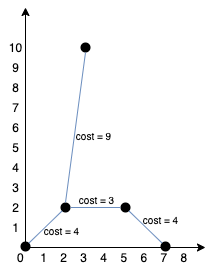

In [ ]:
from queue import PriorityQueue
def minCostConnectPoint(points):
    #points.sort()
    # Adj
    N = len(points)
    adj = [[] for _ in range(N)]      #adj = {i:[] for i in range(N)}
    # Cost is distance between two point
    for i in range(N):
        x1, y1 = points[i]
        for j in range(i + 1, N):
            x2, y2 = points[j]
            dist = abs(x1 - x2) + abs(y1 - y2)
            adj[i].append((dist, j))
            adj[j].append((dist, i))

    # Prim's Algorithm
    visited = set()
    res = 0 
    queue = PriorityQueue()
    queue.put((0, 0))           # (Cost, pointNode)

    while queue.qsize() > 0:
        cost, i = queue.get()
        if i in visited:
            continue
        res += cost
        visited.add(i)
        for (neiCost, nei) in adj[i]:
            if nei not in visited:
                queue.put((neiCost, nei))

    return res 

In [ ]:
import heapq
def minCostConnectPoint(points):
    N = len(points)
    adj = {i : [] for i in range(N)}
    for i in range(N):
        x1, y1 = points[i]
        for j in range(N):
            x2, y2 = points[j]
            dist = abs(x1 - x2) + abs(y1 - y2)
            adj[i].append((dist, j))
            adj[j].append((dist, i))
    # Prim's Algo
    res = 0
    visited = set()
    minH = [(0, 0)]     # Cost, Point Index
    while minH:         # or while len(visited) < N:
        cost, i = heapq.heappop(minH)
        if i in visited:
            continue
        res += cost
        visited.add(i)
        for (neiCost, nei) in adj[i]:
            if nei not in visited:
                heapq.heappush(minH, (neiCost, nei))
    
    return res

In [ ]:
points = [[0,0],[2,2],[3,10],[5,2],[7,0]]
minCostConnectPoint(points)

20

## 8. Cheapest Flights Within K Stops (Bellman-Ford)
    - There are n cities connected by some number of flights. You are given an array flights where flights[i] = [fromi, toi, pricei] indicates that there is a flight from city fromi to city toi with cost pricei.
    - You are also given three integers src, dst, and k, 
    - return the cheapest price from src to dst with at most k stops. If there is no such route, return -1.

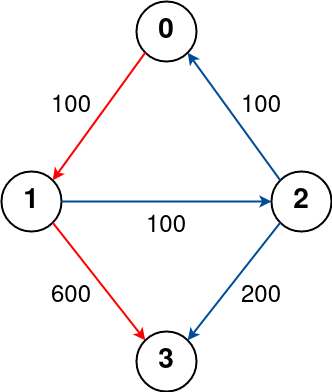

In [ ]:
# Bellman-Ford Algorithm : k + 1 times BFS search
# k stops -> need to temp table
# K stop -> Using Dijastra is difficult
def findCheapestPrice(n, flights, src, dst, k):
    prices = [float("inf")] * n     # Initialize prices
    prices[src] = 0                 # start cost = 0

    for _ in range(k + 1):              # iter all node (x) -> iter (k+1) node
        tmpPrices = prices.copy()       # temp array

        for (s, d, p) in flights:       # source, destination, price
            if prices[s] == float("inf"):
                continue
            if prices[s] + p < tmpPrices[d]:    
                tmpPrices[d] = prices[s] + p
        
        prices = tmpPrices
        print(prices)

    return -1 if prices[dst] == float("inf") else prices[dst]

In [ ]:
"""
Input: n = 4, flights = [[0,1,100],[1,2,100],[2,0,100],[1,3,600],[2,3,200]], src = 0, dst = 3, k = 1
Output: 700
Explanation:
The graph is shown above.
The optimal path with at most 1 stop from city 0 to 3 is marked in red and has cost 100 + 600 = 700.
Note that the path through cities [0,1,2,3] is cheaper but is invalid because it uses 2 stops.
"""
n = 4
flights =  [[0,1,100],[1,2,100],[2,0,100],[1,3,600],[2,3,200]]
src, dst, k = 0, 3, 1

findCheapestPrice(n, flights, src, dst, k)

[0, 100, inf, inf]
[0, 100, 200, 700]


700

## 9. Minimum Spanning Tree (Union-Find)
    - 그래프에서 모든 노드를 연결할 때 사용된 에지의 가중치 합을 최소로 하는 Tree
    - 1. 노드를 모두 연결하면서 2. 비용이 최소가 되는 Graph
    - 통신망, 유통망의 구축비용 최소화 문제

In [ ]:
import heapq
def minimumSpanningTree(N, connections):
    # parent list for Union-Find
    par = [i for i in range(N+1)]
    # Push all emelments in heap list 
    minH = []
    for (v, u, cost) in connections:
        heapq.heappush(minH, (cost, v, u))
    
    # Find
    def find(n1):
        if n1 == par[n1]:
            return n1
        else:
            par[n1] = find(par[n1])
            return par[n1]
    
    # Union
    def union(n1, n2):
        n1 = find(n1)
        n2 = find(n2)
        if n1 != n2:
            par[n2] = n1

    # MST : using edge < N-1
    use_edge, res = 0, 0
    #treeConn = []
    while use_edge < N - 1:
        cost, v, u = heapq.heappop(minH)
        if find(v) != find(u):
            union(v, u)
            res += cost
            #treeConn .append((v,u))
            use_edge += 1
    #print(treeConn)
    return res

In [ ]:
N = 5
connections = [(1,2,1), (1,3,3), (2,3,2), (2,5,10), (3,4,5), (3,1,4), (4,5,10)]

minimumSpanningTree(N, connections)

18

## 10. Number of Connected Components in an Undirected Graph (Union-Find)
    - Return the number of connected component in the graph.
    - Soluntion : 1) DFS 횟수를 Count 2) Union-Find

In [ ]:
def numConnected(n, edges):
    par = [i for i in range(n)]
    rank = [1] * n

    def find(n1):
        res = n1
        while res != par[res]:
            par[res] = par[par[res]]
            res = par[res]
        return res
    
    def union(n1, n2):
        p1, p2 = find(n1), find(n2)

        if p1 == p2:
            return 0
        
        if rank[p2] > rank[p1]:
            par[p1] = p2
            rank[p2] += rank[p1]
        else:
            par[p2] = p1
            rank[p1] += rank[p2]
        return 1
    
    res = n
    for n1, n2 in edges:
        res -= union(n1, n2)
    
    return res

In [ ]:
# Count DFS
def numConnected(n, edges):
    adj = [[] for _ in range(n)]
    visited = [False] * (n)
    # undirected
    for (u, v) in edges:
        adj[u].append(v)
        adj[v].append(u)
    
    def DFS(curNode):
        visited[curNode] = True
        for nei in adj[curNode]:
            if not visited[nei]:
                DFS(nei)
    
    count = 0
    for i in range(n):
        if not visited[i]:
            count += 1
            DFS(i)
    
    return count

In [ ]:
# Union-Find
def numConnected(n, edges):
    par = [i for i in range(n)]

    def find(n1):
        if n1 == par[n1]:
            return n1
        else:
            par[n1] = find(par[n1])
            return par[n1]
    
    def union(n1, n2):
        n1 = find(n1)
        n2 = find(n2)
        if n1 != n2:
            par[n2] = n1

    #res = n
    for (n1, n2) in edges:
        union(n1,n2)
    print(par)
    return len(set(par))

In [ ]:
n = 5
edges = [[0, 1], [1, 2], [2, 3], [3, 4]]
numConnected(5, edges)

[0, 0, 0, 0, 0]


1

## 11. Number of Provinces (Union-Find)

    - A province is a group of directly or indirectly connected cities and no other cities outside of the group.
    - You are given an n x n matrix isConnected where isConnected[i][j] = 1 
    - if the ith city and the jth city are directly connected, and isConnected[i][j] = 0 otherwise.

In [ ]:
def findCircleNum(isConnected):
    ROWS = len(isConnected)
    COLS = len(isConnected[0])
    par = [i for i in range(ROWS)]

    def find(x):
        if x == par[x]:
            return x
        else:
            par[x] = find(par[x])
            return par[x]
    
    def union(x, y):
        x = find(x)
        y = find(y)
        if x != y:
            par[y] = x
    
    for r in range(ROWS):
        for c in range(COLS):
            if isConnected[r][c] == 1:
                union(r, c)

    return len(set(par))

In [ ]:
"""
Input: isConnected = [[1,1,0],[1,1,0],[0,0,1]]
Output: 2

Input: isConnected = [[1,0,0],[0,1,0],[0,0,1]]
Output: 3
"""
print(findCircleNum([[1,1,0],[1,1,0],[0,0,1]]))
print(findCircleNum([[1,0,0],[0,1,0],[0,0,1]]))

2
3


## 12. Find Eventual Safe States (Dircted Cycle Detection)
    - A node is a terminal node if there are no outgoing edges. A node is a safe node if every possible path starting from that node leads to a terminal node (or another safe node).
    - Return an array containing all the safe nodes of the graph. The answer should be sorted in ascending order.

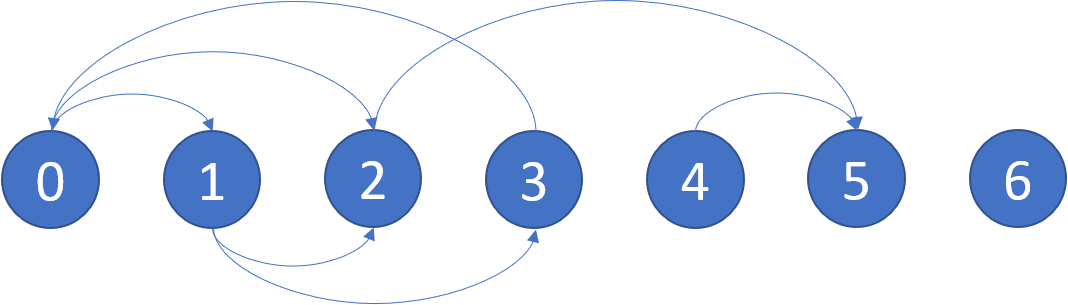

In [ ]:
def eventualSafeNodes(graph):
    unsafe, visited = set(), set()

    def no_cycle(curNode, stack):
        if curNode in visited:
            return curNode not in stack and curNode not in unsafe
        visited.add(curNode)
        stack.add(curNode)

        for nextNode in graph[curNode]:
            if not no_cycle(nextNode, stack):
                unsafe.add(nextNode)
                return False
        stack.remove(curNode)
        return True

    for i in range(len(graph)):
        if i not in visited:
            no_cycle(i, set())
            
    # Terminated Node
    return sorted([i for i in range(len(graph)) if i not in unsafe])

In [ ]:
"""
Input: graph = [[1,2],[2,3],[5],[0],[5],[],[]]
Output: [2,4,5,6]
Explanation: The given graph is shown above.
Nodes 5 and 6 are terminal nodes as there are no outgoing edges from either of them.
Every path starting at nodes 2, 4, 5, and 6 all lead to either node 5 or 6.
"""

eventualSafeNodes([[1,2],[2,3],[5],[0],[5],[],[]])

[2, 4, 5, 6]

## 13. Alien Dictionary
    - 위상 정렬
    - 단어의 배열은 그들의 알파벳 순서를 따른다.
    - 짧은 단어 < 긴 단어
    - 유니크한 케릭터를 리턴


In [ ]:
# Post-Order DFS 탐색 + Reverse

def alienOrder(words):
    adj = {c:set() for w in words for c in w}   # set(char : set())
    for i in range(len(words) - 1):
        w1, w2 = words[i], words[i+1]
        minLen = min(len(w1), len(w2))

        if len(w1) > len(w2) and w1[:minLen] == w2[:minLen]:
            return ""
            
        for j in range(minLen):
            if w1[j] != w2[j]:
                adj[w1[j]].add(w2[j])
                break
    #print(adj)     # {pre_node : cur_node}
    visit = {}      # False = "visited", True = "current path"
    res = []
    
    # Pre-order DFS
    def dfs(c):
        if c in visit:
            return visit[c]     # Return Curr_node
        
        ## Current path 설정 
        visit[c] = True
        #######################
        for nei in adj[c]:
            if dfs(nei):
                return True
        #######################
        ## No Currant path 설정
        visit[c] = False
        res.append(c)
    
    for c in adj:
        if dfs(c):
            return ""
    
    res.reverse()
    
    return "".join(res)

In [ ]:
words = ["wrt", "wrf", "er", "ett", "rftt"]
alienOrder(words)

{'w': {'e'}, 'r': {'t'}, 't': {'f'}, 'f': set(), 'e': {'r'}}


'wertf'